In [1]:
import numpy as np
import os 
import pandas as pd
from matrices import *

kPS = os.sep
folder = os.curdir + kPS + 'random_matrices' + kPS

entropies = list([folder + i for i in os.listdir(folder) if i.startswith('entropies_') and not i.startswith('entropies_var')])
gauss = list([folder + i for i in os.listdir(folder) if i.startswith('gauss')])
entropies_mat = list([folder+ i for i in os.listdir(folder) if i.startswith('m_entropies_') and not i.startswith('m_entropies_var')])
gauss_mat = list([folder + i for i in os.listdir(folder) if i.startswith('m_gauss')])
entropies

C:\Users\maxgr\anaconda3\lib\site-packages\tenpy\tools\optimization.py:307: UserWarning: Couldn't load compiled cython code. Code will run a bit slower.
  warnings.warn("Couldn't load compiled cython code. Code will run a bit slower.")


['.\\random_matrices\\entropies_134596.dat',
 '.\\random_matrices\\entropies_168056.dat',
 '.\\random_matrices\\entropies_304420.dat',
 '.\\random_matrices\\entropies_351553.dat',
 '.\\random_matrices\\entropies_505441.dat',
 '.\\random_matrices\\entropies_679152.dat',
 '.\\random_matrices\\entropies_679304.dat',
 '.\\random_matrices\\entropies_689349.dat',
 '.\\random_matrices\\entropies_717411.dat',
 '.\\random_matrices\\entropies_718793.dat',
 '.\\random_matrices\\entropies_746504.dat',
 '.\\random_matrices\\entropies_807654.dat',
 '.\\random_matrices\\entropies_807662.dat',
 '.\\random_matrices\\entropies_829709.dat',
 '.\\random_matrices\\entropies_907354.dat',
 '.\\random_matrices\\entropies_955370.dat',
 '.\\random_matrices\\entropies_976176.dat']

8 50
10 50
12 50
14 50
15 255
8 50
10 50
12 50
14 50
15 100


(1e-08, 0.1)

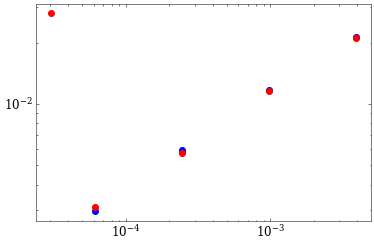

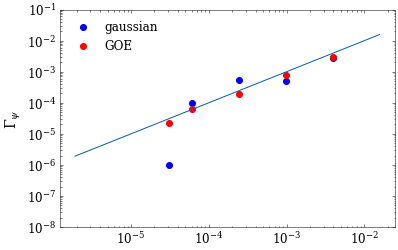

In [2]:
entro = {
    8 : [],
    10 : [],
    12 : [],
    14 : [],
    15 : [],
}
gausses = entro.copy()

for ent in entropies:
    df = pd.read_csv(ent, index_col=0)
    for i, row in df.iterrows():
        entro[i] = entro[i] + list(row)
        
    # print(df)
    # 
prs = {L:page_result(2**(L//2), 2**(L//2)) for L in entro.keys()}

for g in gauss:
    df = pd.read_csv(g, index_col=0)
    for i, row in df.iterrows():
        gausses[i] = gausses[i] + list(row)  
        
# print(gausses)
# ------------------------------------- MATRICES 

entro_m = {
    8 : [],
    10 : [],
    12 : [],
    14 : [],
    15 : []
}
gausses_m = entro_m.copy()

for ent in entropies_mat:
    df = pd.read_csv(ent, index_col=0)
    for i, row in df.iterrows():
        entro_m[i] = entro_m[i] + list(row)
        
for g in gauss_mat:
    df = pd.read_csv(g, index_col=0)
    for i, row in df.iterrows():
        gausses_m[i] = gausses_m[i] + list(row)
        
    # print(df)
    # 
prs = {L:page_result(2**(L//2), 2**(L//2)) for L in entro.keys()}
size = 50
for L in entro.keys():
    point = prs[L] - np.mean(np.random.choice(np.array(entro[L]).flatten(), size=size, replace=False))
    # print(point)
    np.save(folder + "s_L=" + str(L), np.array(entro[L]).flatten())
    plt.scatter(1/(2**L), point, color = 'blue')

for L in entro_m.keys():
    point = prs[L] - np.mean(np.random.choice(np.array(entro_m[L]), size=size, replace=False))
    # print(point)
    np.save(folder + "s_mat_L=" + str(L), np.array(entro_m[L]).flatten())
    plt.scatter(1/(2**L), point, color = 'red')
    
# plt.xlim(0, 0.15)
# plt.ylim(0, 5e-2)
plt.yscale('log')
plt.xscale('log')
plt.figure(2)

# print(gausses)
for L in gausses.keys():
    point = np.abs(np.pi/2 - np.mean(gausses[L]))#np.mean(np.random.choice(np.array(gausses[L]).flatten(), size=size, replace=False))
    print(L, len(gausses[L]))
    np.save(folder + "g_L=" + str(L), np.array(gausses[L]).flatten())
    if L == list(gausses_m.keys())[-1]:
        plt.scatter(1/2**L, point, color = 'blue', label = 'gaussian')
    else:
        plt.scatter(1/2**L, point, color = 'blue')
# print(gausses_m)
for L in gausses_m.keys():
    print(L, len(gausses_m[L]))

    point = np.abs(np.pi/2 - np.mean(gausses_m[L]))#np.mean(np.random.choice(np.array(gausses_m[L]).flatten(), size=size, replace=False))
    np.save(folder + "g_mat_L=" + str(L), np.array(gausses_m[L]).flatten())
    # print(point)
    if L == list(gausses_m.keys())[-1]:
        plt.scatter(1/2**L, point, color = 'red', label = 'GOE')   
    else:
        plt.scatter(1/2**L, point, color = 'red')

plt.plot(1.0/np.array([2**i for i in range(6, 20)]), 1.0/np.array([2**i for i in range(6, 20)]))
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r"$\Gamma _\psi$")
plt.legend()
# plt.xlim(0, 0.15)
plt.ylim(1e-8, 1e-1)